## 기초 회귀분석

[공공데이터 포털](https://www.data.go.kr/index.do)  
[국가데이터 포털](http://kosis.kr/index/index.do;jsessionid=scj4MBBcLckIlSdvyCGUz5NbVjZw1iImrtabzwXaOV87aNPoV2evvfX059UazXWa.STAT_WAS2_servlet_engine1)   
[통계청](http://kostat.go.kr/portal/korea/index.action)   
[Kaggle Datasets](https://www.kaggle.com/datasets)

**키와 몸무게의 상관관계**   
**GDP와 행복의 상관관계**  
**어떤 요인이 집값에 영향을 미칠까?**

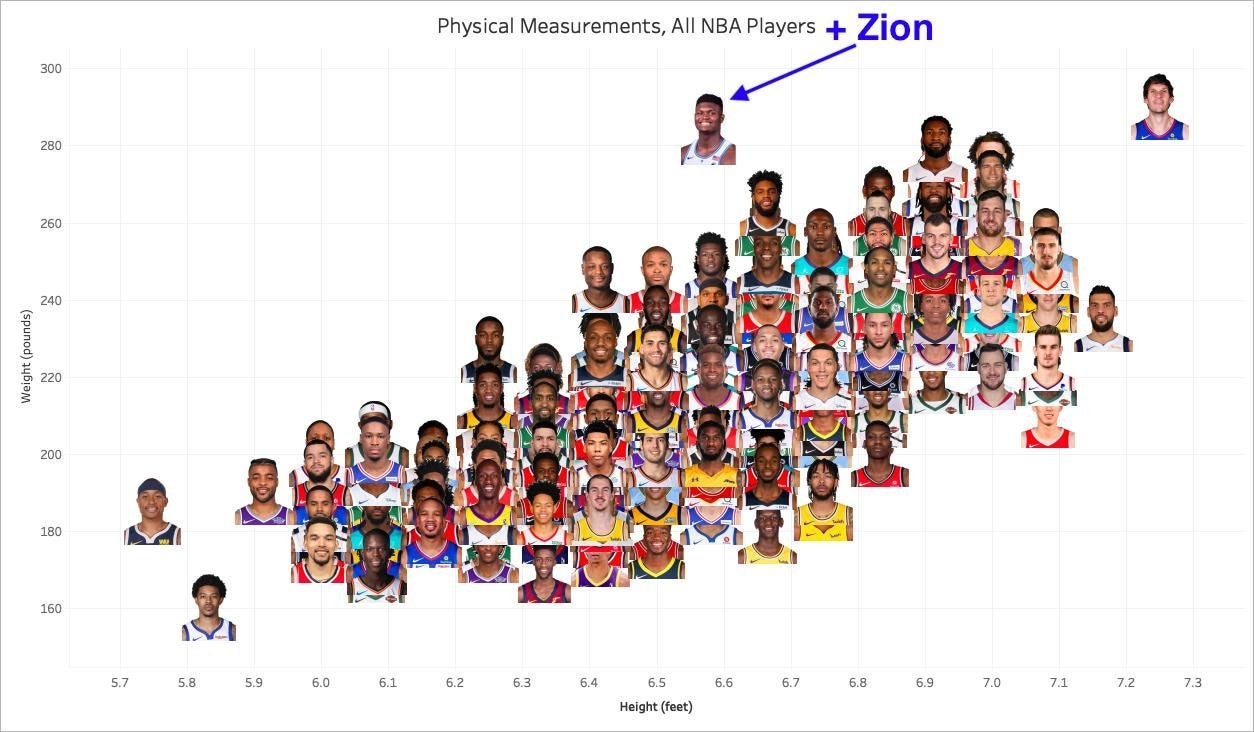

In [549]:
from IPython.display import Image
Image("aa.jpg")

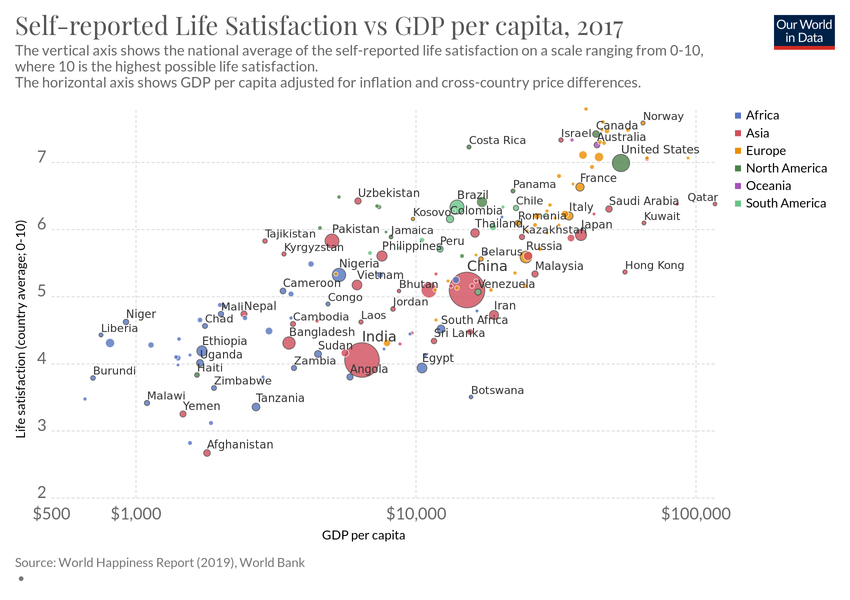

In [550]:
Image("bb.png")

### 정말로 키와 몸무게는 상관관계가 있을까?

#### 필요한 library 임포트

In [624]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [627]:
import warnings

warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

#### 데이터 불러오기 및 전처리

In [635]:
df = pd.read_csv('student.csv', engine = 'python')

In [636]:
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9686 non-null   object 
 1   최종가중치       9686 non-null   float64
 2   학교ID        9686 non-null   object 
 3   도시규모        9686 non-null   object 
 4   도시규모별분석용    9686 non-null   object 
 5   학년도         9686 non-null   int64  
 6   광역시도        9686 non-null   object 
 7   시도별         9686 non-null   object 
 8   학교급별        9686 non-null   int64  
 9   학교명         9686 non-null   object 
 10  공학여부        9686 non-null   object 
 11  학년          9686 non-null   int64  
 12  반           9686 non-null   int64  
 13  성별          9686 non-null   object 
 14  건강검진일       9686 non-null   int64  
 15  키           9686 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [638]:
df.describe()

,최종가중치,학년도,학교급별,학년,반,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9.686000e+03,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,2.015047e+07,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,1.014788e+02,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,2.015023e+07,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,2.015041e+07,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,2.015043e+07,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,2.015051e+07,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,2.015091e+07,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


#### 키, 몸무게 제외한 나머지 columns 지우기

In [639]:
data = df.loc[:,['키','몸무게']]

# del df['지울 column 이름']
# df = df.drop([''지울 column 이름], axis=1)

In [640]:
data.head()

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


In [641]:
data.isnull().sum()

키      0
몸무게    4
dtype: int64

In [642]:
data.dropna(inplace=True)
print(data.isnull().sum())

키      0
몸무게    0
dtype: int64


In [643]:
height = data['키']
weight = data['몸무게']

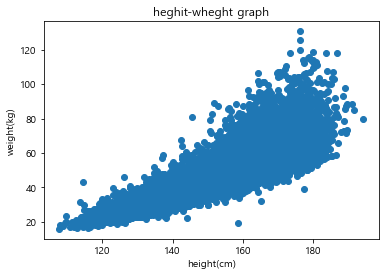

In [644]:
plt.plot(height, weight, 'o')
plt.title('heghit-wheght graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

In [645]:
# ols 사용

height1 = sm.add_constant(height, has_constant='add')

lm = sm.OLS(weight, height1)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    몸무게   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:44:11   Log-Likelihood:                -35036.
No. Observations:                9682   AIC:                         7.008e+04
Df Residuals:                    9680   BIC:                         7.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.8267      0.840    -97.388      0.000     -83.474     -80.180
키              0.8542      0.005    158.088      0.000       0.844       0.865
==============================================================================
Omnibus:                     2123.133   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5777.039
Skew:                           1.169   Prob(JB):                         0.00
Kurtosis:                       5.975   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### weight  = -81.8267 + 0.8542 * height

In [647]:
# scikit-learn 사용

rl = LinearRegression()
rl.fit(height.values.reshape(-1, 1),weight)

# reshape하는 이유는 X데이터가 2차원 array형태여야 하기 때문

LinearRegression()

In [653]:
print(type(height))
print(type(height.values.reshape(-1,1)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [654]:
print('기울기: ',rl.coef_)
print('절편:', rl.intercept_)

기울기:  [0.85423238]
절편: -81.82669252685602


In [655]:
rl.predict([[180]])
# 키가 180cm인 사람 몸무게 예측

array([71.93513579])

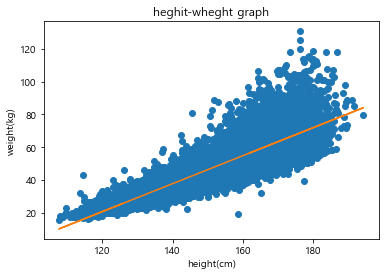

In [656]:
plt.plot(height, weight, 'o')
plt.plot(height,rl.predict(height.values.reshape(-1,1)))
plt.title('heghit-wheght graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

In [657]:
predict = rl.predict(height.values.reshape(-1,1))
r2 = 1 - ((weight - predict)**2).sum() / ((weight - weight.mean())**2).sum()
print('R^2: ' ,r2)

R^2:  0.7208109142636866


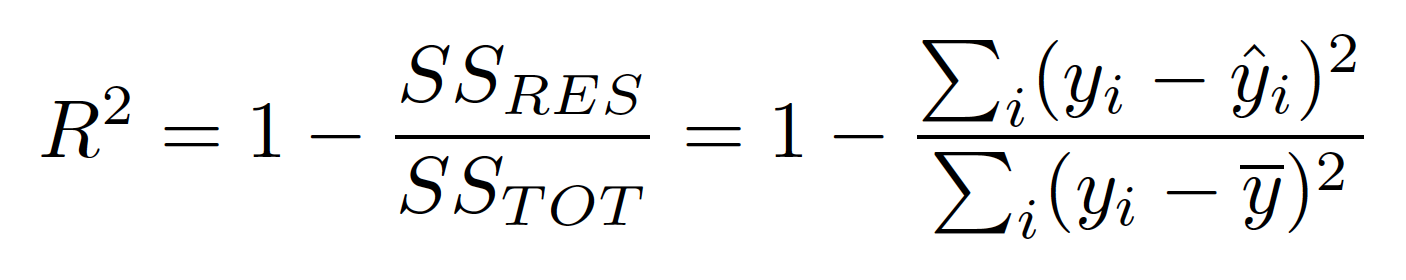

In [658]:
Image("r^2 formula.png")

In [659]:
mse = np.mean((weight - predict)**2)
print('MSE: ', mse)

MSE:  81.39982518590324


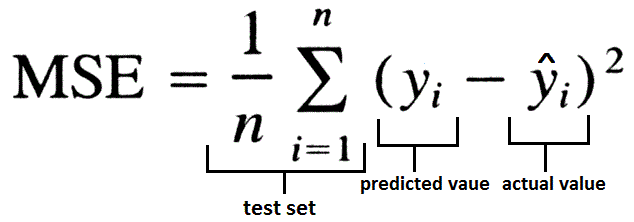

In [660]:
Image("MSE formula.png")

### 실습: 보스톤 집값 예측 모델

#### 주택당 방 수(RM) 데이터를 가지고 집값 예측하는 선형 회귀모형 만들어보기
- 기울기, 절편
- R^2, MSE

In [666]:
boston = pd.read_csv("Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [667]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율

'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율\n\n'

In [668]:
price = boston[['Target']]
RM  = boston[['RM']]

In [669]:
rl = LinearRegression()
rl.fit(RM,price)

LinearRegression()

In [670]:
print('기울기: ',rl.coef_)
print('절편:', rl.intercept_)

기울기:  [[9.10210898]]
절편: [-34.67062078]


In [671]:
price_hat = rl.predict(RM)
print('R^2: ', rl.score(RM, price))
print('MSE: ', mean_squared_error(price,price_hat))

R^2:  0.48352545599133423
MSE:  43.60055177116956


## Multiple Regression

In [672]:
df = pd.read_csv('energy_dataset.csv')

In [673]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [675]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [676]:
df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True)

In [677]:
df.dropna(inplace=True)

In [678]:
df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [689]:
X = df.loc[:,['total load actual','price day ahead']] # 2개 데이터
y = df.loc[:,'price actual']
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,total load actual,price day ahead
0,25385.0,50.10
1,24382.0,48.10
2,22734.0,47.33
3,21286.0,42.27
4,20264.0,38.41
...,...,...
35059,30653.0,68.85
35060,29735.0,68.40
35061,28071.0,66.88
35062,25801.0,63.93


In [690]:
X = X.values
y = y.values
print(type(X))
X

<class 'numpy.ndarray'>


array([[25385.  ,    50.1 ],
       [24382.  ,    48.1 ],
       [22734.  ,    47.33],
       ...,
       [28071.  ,    66.88],
       [25801.  ,    63.93],
       [24455.  ,    64.27]])

In [681]:
mul_reg = LinearRegression()
mul_reg.fit(X,y)

LinearRegression()

In [682]:
print('기울기: ',mul_reg.coef_)
print('절편:', mul_reg.intercept_)

기울기:  [3.53417224e-04 6.59637935e-01]
절편: 14.849636913946469


In [683]:
y_hat = mul_reg.predict(X)

In [684]:
print('R^2: ', mul_reg.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.5480997942859913
MSE:  90.9937872669527


#### 실습 - winearoma 데이터셋에 대해서 모형 학습하고 R^2, MSE 계산

In [591]:
wine = pd.read_excel('wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [592]:
Input_wine= wine.iloc[:,:-1].values
Output_wine = wine.iloc[:,-1].values

In [593]:
mul_reg2 = LinearRegression()
mul_reg2.fit(Input_wine,Output_wine)

LinearRegression()

In [594]:
print('기울기: ',mul_reg2.coef_)
print('절편:', mul_reg2.intercept_)

기울기:  [ 7.91277584e+00  1.67032230e+00 -1.81369288e+01 -1.56427971e+00
 -2.53866832e-01  9.60786667e-02  4.97181435e-04 -3.50428862e-02
  1.39771428e-03]
절편: 6.2003307680014625


In [595]:
Output_hat2 = mul_reg2.predict(Input_wine)

In [596]:
print('R^2: ', mul_reg2.score(Input_wine, Output_wine))
print('MSE: ', mean_squared_error(Output_wine,Output_hat2))

R^2:  0.8354464499560966
MSE:  0.193367534870791


In [691]:
Input_wine1= wine.iloc[:,:-1]
Output_wine1 = wine.iloc[:,-1]

In [692]:
# ols 사용

Input_wine1 = sm.add_constant(Input_wine1, has_constant='add')

lm = sm.OLS(Output_wine1, Input_wine1)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Aroma   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     8.462
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           0.000187
Time:                        16:09:58   Log-Likelihood:                -14.934
No. Observations:                  25   AIC:                             49.87
Df Residuals:                      15   BIC:                             62.06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2003      0.948      6.539      0.000       4.179       8.221
Mo             7.9128      5.481      1.444      0.169      -3.770      19.596
Ba             1.6703      2.608      0.640      0.532      -3.889       7.230
Cr           -18.1369     10.976     -1.652      0.119     -41.532       5.259
Sr            -1.5643      0.862     -1.814      0.090      -3.402       0.274
Pb            -0.2539      1.280     -0.198      0.845      -2.983       2.475
B              0.0961      0.118      0.815      0.428      -0.155       0.347
Mg             0.0005      0.008      0.066      0.949      -0.016       0.017
Ca            -0.0350      0.011     -3.295      0.005      -0.058      -0.012
K              0.0014      0.001      0.990      0.338      -0.002       0.004
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.164
Skew:                           0.637   Prob(JB):                        0.339
Kurtosis:                       2.325   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 이상치 제거만 해도 성능이 높아질 수 있다.

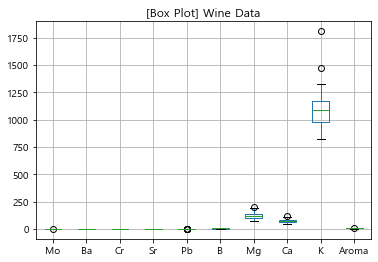

In [696]:
wine.boxplot()
# plt.title('[Box Plot] Wine Data')
plt.show()

In [702]:
not_outlier = wine['K'] < 1300
wine2 = wine.loc[not_outlier,:]

Input_wine2= wine2.iloc[:,:-1]
Output_wine2 = wine2.iloc[:,-1]

In [703]:
Input_wine2= Input_wine2.values
Output_wine2 = Output_wine2.values

In [704]:
mul_reg3 = LinearRegression()
mul_reg3.fit(Input_wine2,Output_wine2)

LinearRegression()

In [705]:
print('기울기: ',mul_reg3.coef_)
print('절편:', mul_reg3.intercept_)

기울기:  [ 1.02918180e+01  8.41770286e+00 -2.37177780e+01 -3.21701077e+00
 -8.00144417e-01  2.08272979e-01 -9.76751447e-03 -1.39740374e-02
  1.18949414e-03]
절편: 5.6245053409896535


In [706]:
Output_hat3 = mul_reg3.predict(Input_wine2)

In [707]:
print('R^2: ', mul_reg3.score(Input_wine2, Output_wine2))
print('MSE: ', mean_squared_error(Output_wine2,Output_hat3))

R^2:  0.8547653366390577
MSE:  0.16119847346590535


## + 데이터 시각화

<Figure size 432x288 with 0 Axes>

C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


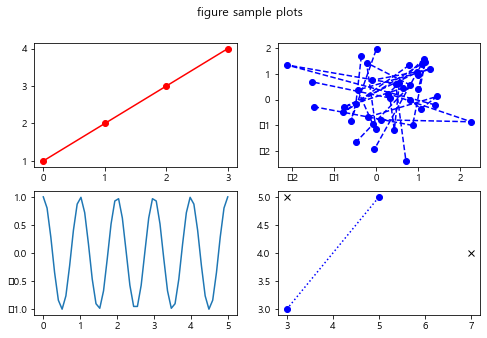

In [600]:
fig = plt.figure()

fig, ax = plt.subplots(2, 2, figsize=(8,5))

fig.suptitle('figure sample plots')
ax[0][0].plot([1,2,3,4], 'ro-')
ax[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax[1][1].plot([3,5], [3,5], 'bo:')
ax[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [601]:
# matplotlib.pyplot 임포트
import matplotlib.pyplot as plt

In [602]:
# Series를 통한 line plot 그리기
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.088489
10   -0.176358
20    1.241626
30    1.358841
40    1.609184
50    1.828564
60    1.295407
70    0.374855
80    1.203770
90    1.217541
dtype: float64

C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


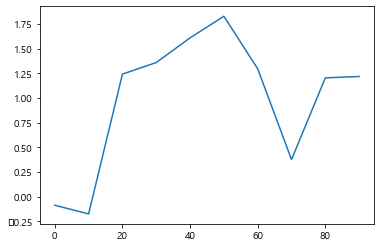

In [603]:
# 위에서 정의한 s라는 시리즈에 대해서 line plot을 그리고 싶다면?
s.plot()

In [604]:
# DataFrame을 통한 line plot 그리기
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.602576,1.051037,-0.831258,-0.927717
10,0.411091,-0.466759,0.350177,-1.391821
20,1.698661,-1.318786,-1.184846,-0.169022
30,1.319495,-1.779451,-1.319961,-0.537102
40,1.816687,-0.169900,-0.223673,0.577570
50,4.227220,-1.595358,-1.320496,0.605100
60,5.027935,-1.740176,-1.597361,-0.120464
70,5.076863,-1.718857,-0.741203,0.408008
80,5.118101,-1.930642,0.054496,1.046282
90,4.143752,-1.759257,0.820641,0.105321


C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


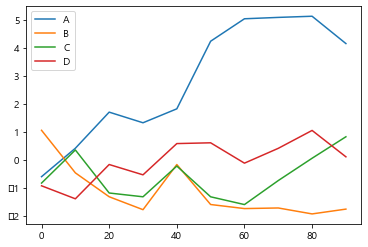

In [605]:
df.plot()

C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hkjang\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


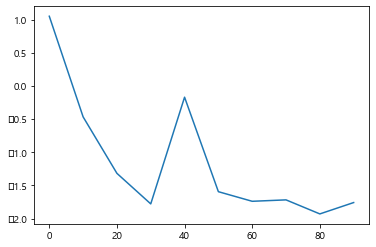

In [606]:
# 하나의 열에 대해서만 보고 싶다면?
df['B'].plot()

In [709]:
?plot()

Object `plot()` not found.


In [607]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2


a    0.073865
b    0.842138
c    0.318181
d    0.658382
e    0.573414
f    0.429923
g    0.621616
h    0.879727
i    0.911938
j    0.698685
k    0.633523
l    0.609317
m    0.786514
n    0.576457
o    0.858014
p    0.985969
dtype: float64

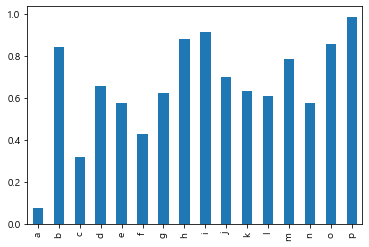

In [608]:
s2.plot(kind='bar')

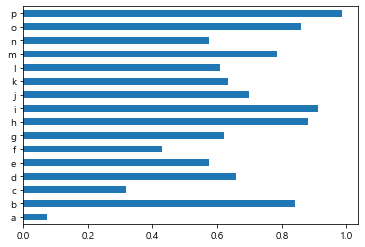

In [609]:
# 가로방향의 bar plot그리기
s2.plot(kind='barh')

In [710]:
df2 = pd.DataFrame(np.random.rand(6, 4), 
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

Genus,A,B,C,D
one,0.769616,0.654806,0.972326,0.772186
two,0.576617,0.310382,0.474009,0.389824
three,0.417468,0.902945,0.776655,0.240161
four,0.066917,0.010178,0.142845,0.622751
five,0.592491,0.238840,0.701827,0.226529
six,0.154103,0.944098,0.537496,0.266631


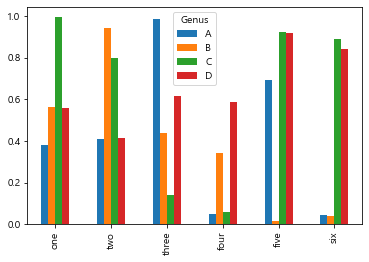

In [651]:
df2.plot(kind='bar')

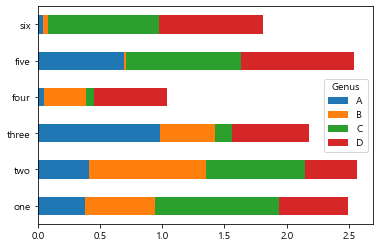

In [652]:
df2.plot(kind='barh', stacked=True)
# stacked 속성을 true로 설정하면, 각 열의 값을 한줄로 쌓아서 나타내준다.

In [712]:
# histogram은 index가 필요없다.
s3 = pd.Series(np.random.normal(0, 1, size=200))
s3

0     -0.143699
1     -0.755336
2     -0.026802
3     -0.173136
4     -0.554455
         ...   
195    1.248675
196    0.814962
197   -0.691958
198    0.371440
199   -0.062317
Length: 200, dtype: float64

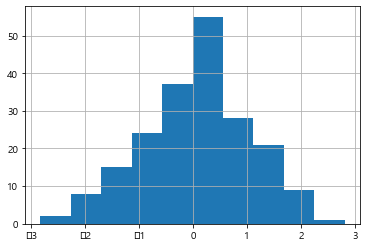

In [716]:
s3.hist()

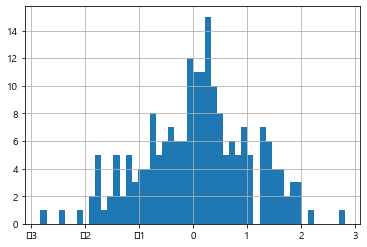

In [714]:
s3.hist(bins=50)
# x축 구간 갯수를 bin이라고 하는데, 이는 직접 설정할 수 있다.

## Train_test_set_split & evaluation

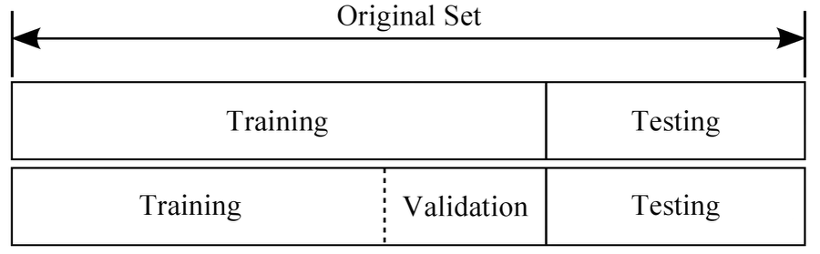

In [717]:
Image("ee.png")

In [718]:
from sklearn.model_selection import train_test_split

In [719]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [720]:
Num_obs = df.shape[0]
print(Num_obs)

35017


In [721]:
Input = df.loc[:,'generation biomass':'generation wind onshore'] # 20개 데이터
Output =  df.loc[:,'price actual']

In [727]:
Input_np = Input.values
Output_np = Output.values

In [728]:
lr2= LinearRegression()
lr2.fit(Input_np, Output_np)

Output_np_hat = lr2.predict(Input_np)

print('MSE: ', mean_squared_error(Output_np,Output_np_hat))
print('R^2: ', lr2.score(Input_np, Output_np))

MSE:  125.58275081108252
R^2:  0.3763214761116974


In [724]:
X_train, X_test, y_train, y_test = train_test_split(Input_np,
                                                    Output_np,
                                                    test_size=0.2,
                                                    random_state=1004)

In [725]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (28013, 20)
X_test shape: (7004, 20)
y_train shape: (28013,)
y_test shape: (7004,)


In [726]:
# train set만을 이용해서 모형 학습
lr2= LinearRegression()
lr2.fit(X_train, y_train)
# train set에서의 성능
y_train_hat = lr2.predict(X_train)
print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
print('train셋 R^2: ', lr2.score(X_train, y_train))
# test set에서의 성능
y_test_hat = lr2.predict(X_test)
print('*' *30)
print('test셋 MSE: ', mean_squared_error(y_test,y_test_hat))

train셋 MSE:  124.44428476904481
train셋 R^2:  0.3787270334716948
******************************
test셋 MSE:  130.18952091181006


### 실습 - winearoma 데이터셋에 대해서 train과 test set 에러를 계산하기

test set: 0.3

x데이터: Input_wine   
y데이터: Output_wine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Input_wine,
                                                    Output_wine,
                                                    test_size=0.3,
                                                    random_state=1004)

In [614]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (17, 9)
X_test shape: (8, 9)
y_train shape: (17,)
y_test shape: (8,)


In [615]:
# train set만을 이용해서 모형 학습
rl= LinearRegression()
rl.fit(X_train, y_train)
# train set에서의 성능
y_train_hat = rl.predict(X_train)
print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
print('train셋 R^2: ', rl.score(X_train, y_train))
# test set에서의 성능
y_test_hat = rl.predict(X_test)
print('*' *30)
print('test셋 MSE: ', mean_squared_error(y_test,y_test_hat))

train셋 MSE:  0.12984207603821368
train셋 R^2:  0.8981976126558769
******************************
test셋 MSE:  0.8601472477656859


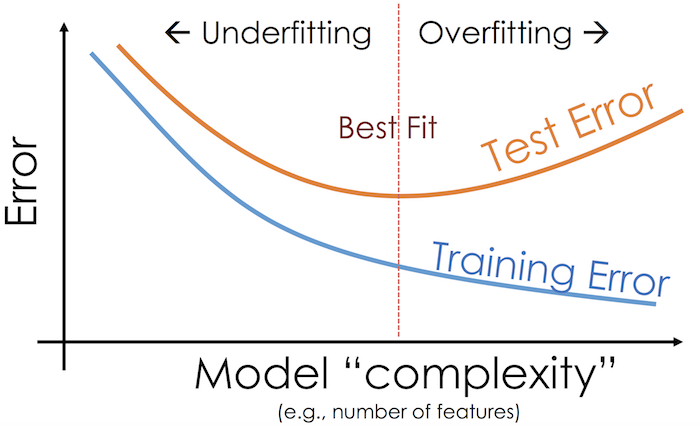

In [616]:
Image("train,test.png")

## Cross validation 이용


In [617]:
from sklearn.model_selection import KFold

In [618]:
# cross validation 예제
idx = np.arange(10)
kf2 = KFold(n_splits=5, shuffle=False)
for fold,(idx_train, idx_test) in enumerate(kf2.split(idx)):
    print('fold:',fold)
    print("idx train:",idx_train, "idx test:",idx_test)
    

fold: 0
idx train: [2 3 4 5 6 7 8 9] idx test: [0 1]
fold: 1
idx train: [0 1 4 5 6 7 8 9] idx test: [2 3]
fold: 2
idx train: [0 1 2 3 6 7 8 9] idx test: [4 5]
fold: 3
idx train: [0 1 2 3 4 5 8 9] idx test: [6 7]
fold: 4
idx train: [0 1 2 3 4 5 6 7] idx test: [8 9]


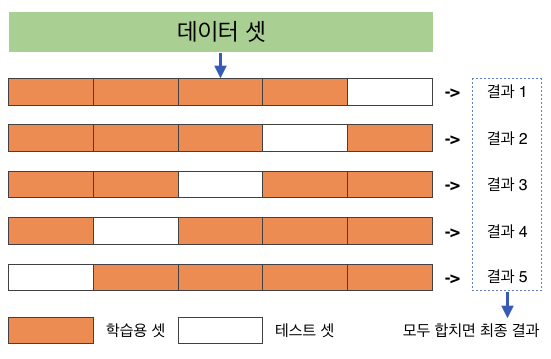

In [619]:
Image("dd.png")

In [620]:
from sklearn.model_selection import cross_val_score

In [730]:
score = cross_val_score(rl, Input_np, Output_np, cv=5 , scoring='neg_mean_squared_error')
print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [-212.99344336 -347.39875488 -130.18307675  -97.00602282 -189.28840681]
cross validataion average score:  -195.37394092623285


In [729]:
?cross_val_score

### 실습 - winearoma 데이터셋에 대해서 cross validation을 3번반복 했을때 test error 계산하기


In [ ]:
rl, Input_wine, Output_wine

In [731]:
score = cross_val_score(rl, Input_wine, Output_wine, cv=3 , scoring='neg_mean_squared_error')
print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [-0.51044519 -0.77951615 -0.41157738]
cross validataion average score:  -0.567179569427264


#### 다음시간

변수선택, 정규화, adjusted R^2, 명목형 변수 처리 등

In [743]:
from sklearn import datasets

dataset = datasets.load_diabetes()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [745]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [740]:
X = df.loc[:,'alcohol'] # 20개 데이터
y =  df.loc[:,'malic_acid':'proline']

In [741]:
X = X.values
y = y.values

In [742]:
lr2= LinearRegression()
lr2.fit(Input_np, Output_np)
Output_np_hat = lr2.predict(Input_np)

print('MSE: ', mean_squared_error(Output_np,Output_np_hat))
print('R^2: ', lr2.score(Input_np, Output_np))

MSE:  125.58275081108252
R^2:  0.3763214761116974
